In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 

In [11]:
path = '/Users/charlie/ML/Stocks/Data/tqqq_trades.csv'

In [12]:
df = pd.read_csv(path)
df.head(1)

,Unnamed: 0,Security,TimeStamp,Num Of Trading Min,OrderType,LastBuyScore,LastSellScore,Position Num of Buys,Position Current Price Real,Position Current Price 10 Min avg,Security Trade Signal,Security Trade Signal Reason,Security Trade Score,Opp Security,Opp Security Trade Signal,Opp Security Trade Score,BuyReason,SellReason,Open Price,Previous Closing Price,Short MAVG 5,Long MAVG 13,Short MAVG Min,Long MAVG Min,MAVG Min Diff,ATR Stoploss Range,ATR Stoploss,Slope 15 Min,Slope 15 Min Win Diff,RSI,Previous Day RSI,RSI Slope,RSI Gain Percent,Last AB Pattern,Last AB Date,Last AB Age,Last AB Buy Level,Last AB Stop-Loss Level,Last AB Sell Level,Last AB Signal,Last AB Total Net,Last AB Net Age Ratio,Last Confirmation Level,Last Confirmation Date,Last Confirmation Age,Last Confirmed Signal,Last Confirmed AB Confirmation Level,Last Confirmed AB Confirmation Date,Last Confirmed AB Age,Last Confirmed AB Total Net,Position Amount,Position Cost Basis,Position Gain Loss,Position Gain Loss Percent,Position Last Buy DT,Position Num of Days Held,Position Gain Avg Per Day,Position Held Max High,Position Held Max Gain,Position Held Max Gain Percent,Position Held Max Gain Loss Ratio,Position Day High,Position Day High Gain Loss Percent,Position Day High Trail Percent,Position Day Slope High,Position Day Slope Trail,Daily Current Gain Loss Percent,Daily Max Gain Percent,Daily Max Gain Loss Ratio,Daily Max Loss Percent,Daily Max Loss Ratio,Daily Current Gain Loss Percent From Open,Daily Max Gain Percent From Open,Daily Max Gain Loss Ratio From Open,Daily Current Gain Loss Diff From Open Close,Position Trailing Stop,Position Trailing Percent,Position Trailing Loss Percent,Position Last Sell DT,Position Num of Days Since Last Sell,Opp Pos Num of Days Since Last Buy,Opp Pos Num of Days Since Last Sell,OrderId
0,4,TQQQ,2021-08-12 14:26:00+00:00,56,BUY,1.318326,NaN,1,67.11,67.0175,BUY,['Buy Method 4: Bullish Major Turning Point in...,-2.684436,SQQQ,NaN,5.84345,['Buy Method 4: Bullish Major Turning Point in...,NaN,66.905,67.19,67.651,67.399231,66.6327,66.629383,0.003317,1.869736,65.035264,35.140854,31.988996,42.808179,46.75146,-3.943282,-8.434564,BEARISH ENGULFING,2021-08-10,2,NaN,69.055,67.555,SELL,5,2.5,67.19,2021-08-11 0:00:00,100,SELL,67.19,2021-08-11,1,5,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0.0,0,-0.119065,-0.059533,-0.003544,-1.592499,2.346441,0.305105,-0.059533,0.021708,0.42417,0,0,0,NaN,NaN,1,1,0a623f13308549c9abcfe85ed7f165d8


In [13]:
len(df)

349

In [14]:
df.isnull().sum()

Unnamed: 0                                        0
Security                                          0
TimeStamp                                         0
Num Of Trading Min                                0
OrderType                                         0
LastBuyScore                                      0
LastSellScore                                   349
Position Num of Buys                              0
Position Current Price Real                       0
Position Current Price 10 Min avg                 0
Security Trade Signal                             0
Security Trade Signal Reason                      0
Security Trade Score                              0
Opp Security                                      0
Opp Security Trade Signal                       311
Opp Security Trade Score                          0
BuyReason                                         0
SellReason                                      349
Open Price                                        0
Previous Clo

In [15]:
df = df.drop(columns=['Position Trailing Loss Percent', 'Position Trailing Percent', 'Position Trailing Stop', 'Position Day Slope Trail', 'Position Day High Trail Percent', 'Position Day High Gain Loss Percent', 'Position Day High', 'Position Held Max Gain Loss Ratio', 'Position Held Max Gain Percent', 'Unnamed: 0', 'LastSellScore', 'Position Held Max High', 'Position Held Max Gain', 'Position Amount', 'Position Cost Basis', 'Position Gain Avg Per Day', 'Position Num of Days Held', 'Position Gain Loss', 'Position Gain Loss Percent', 'Last Confirmation Age', 'Position Cost Basis', 'Position Amount', 'Last Confirmed AB Confirmation Date', 'Last AB Date', 'OrderType', 'LastSellScore', 'Opp Security Trade Signal', 'SellReason', 'Last AB Buy Level', 'Last AB Sell Level', 'Last AB Signal', 'Last Confirmation Level', 'Last Confirmation Date', 'Unnamed: 0', 'Security', 'TimeStamp', 'OrderId'])
df = df.dropna()
df.isnull().sum().sum()

0

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

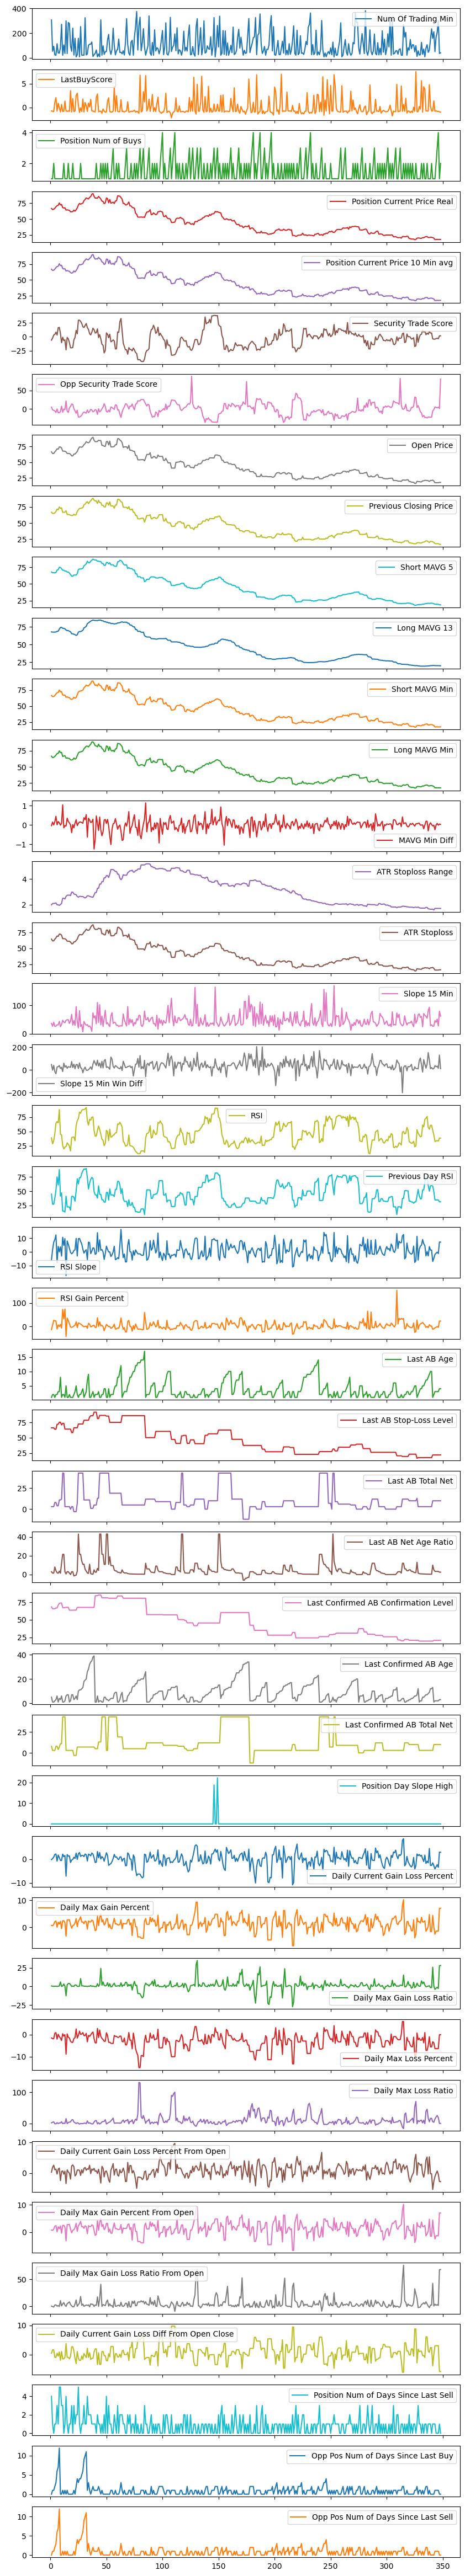

In [16]:
df.plot(figsize=(10, 60), subplots=True)

In [17]:
lbe = LabelEncoder()
df['Opp Security'] = lbe.fit_transform(df['Opp Security'])
df['BuyReason'] = lbe.fit_transform(df['BuyReason'])
df['Last Confirmed Signal'] = lbe.fit_transform(df['Last Confirmed Signal'])
df['Security Trade Signal Reason'] = lbe.fit_transform(df['Security Trade Signal Reason'])
df['Last AB Pattern'] = lbe.fit_transform(df['Last AB Pattern'])
df['Security Trade Signal'] = lbe.fit_transform(df['Security Trade Signal'])
df['Position Last Buy DT'] = lbe.fit_transform(df['Position Last Buy DT'])
df['Position Last Sell DT'] = lbe.fit_transform(df['Position Last Sell DT'])

In [18]:
# def helper(input):
#     if input > 0:
#         return True
#     return False
# df['LastBuyScore'] = df['LastBuyScore'].apply(helper)

In [19]:
df.head()

,Num Of Trading Min,LastBuyScore,Position Num of Buys,Position Current Price Real,Position Current Price 10 Min avg,Security Trade Signal,Security Trade Signal Reason,Security Trade Score,Opp Security,Opp Security Trade Score,BuyReason,Open Price,Previous Closing Price,Short MAVG 5,Long MAVG 13,Short MAVG Min,Long MAVG Min,MAVG Min Diff,ATR Stoploss Range,ATR Stoploss,Slope 15 Min,Slope 15 Min Win Diff,RSI,Previous Day RSI,RSI Slope,RSI Gain Percent,Last AB Pattern,Last AB Age,Last AB Stop-Loss Level,Last AB Total Net,Last AB Net Age Ratio,Last Confirmed Signal,Last Confirmed AB Confirmation Level,Last Confirmed AB Age,Last Confirmed AB Total Net,Position Last Buy DT,Position Day Slope High,Daily Current Gain Loss Percent,Daily Max Gain Percent,Daily Max Gain Loss Ratio,Daily Max Loss Percent,Daily Max Loss Ratio,Daily Current Gain Loss Percent From Open,Daily Max Gain Percent From Open,Daily Max Gain Loss Ratio From Open,Daily Current Gain Loss Diff From Open Close,Position Last Sell DT,Position Num of Days Since Last Sell,Opp Pos Num of Days Since Last Buy,Opp Pos Num of Days Since Last Sell
1,307,-0.752129,1,66.780,66.8420,0,6,-5.967799,0,5.209109,6,66.550,66.885,67.7810,67.788846,66.569300,66.613600,-0.044300,1.996510,64.553490,36.402546,47.722228,38.866392,44.794960,-5.928568,-13.234900,11,1,66.120,3,3.0,0,68.460,5,8,0,0.0,-0.156986,0.710174,0.615835,-1.517530,2.064667,0.343874,0.710174,0.260137,0.500860,0,4.0,0,0
2,53,-0.827437,1,65.115,64.9925,0,6,-2.304925,0,-1.995048,6,63.870,64.940,66.7170,67.498077,64.719567,64.575383,0.144183,2.097237,61.772763,26.725338,-1.979978,28.503168,26.902708,1.600460,5.949065,11,2,66.120,3,1.5,2,65.750,1,3,1,0.0,0.269480,0.608254,0.206061,-1.870958,4.004668,1.917154,0.608254,-0.796144,1.647675,1,1.0,1,1
3,93,-0.890121,2,65.555,65.4275,0,6,3.168636,0,-3.562561,6,63.870,64.940,66.7170,67.498077,64.914500,64.918050,-0.003550,2.097237,61.772763,40.653666,39.561330,33.976728,26.902708,7.074020,26.294826,11,2,66.120,3,1.5,2,65.750,1,3,2,0.0,0.947028,1.053280,0.111913,-1.870958,5.272333,2.594703,1.053280,-1.623550,1.647675,2,0.0,1,1
4,23,1.049423,1,67.205,67.0900,0,6,4.192252,0,-4.907624,6,66.475,65.865,66.5430,67.513077,66.509600,66.343383,0.166217,2.119445,64.355555,25.999220,-15.740310,46.398256,37.355620,9.042637,24.206897,26,1,63.725,8,8.0,2,65.750,2,3,3,0.0,2.034464,2.148334,0.244629,0.645259,-0.896397,1.108328,2.148334,2.234280,-0.926137,3,1.0,2,2
5,21,2.056933,1,69.405,69.4000,0,4,8.306845,0,-9.292201,4,68.515,67.900,66.8808,67.708385,68.836733,68.394967,0.441767,2.142778,66.372222,26.767875,-33.572576,64.257315,51.812547,12.444768,24.018831,26,2,63.725,8,4.0,0,66.838,3,8,4,0.0,2.216495,2.334315,0.275030,0.883652,-1.177769,1.310751,2.334315,2.389321,-0.905744,4,1.0,3,3


In [20]:
# df.to_csv('/Users/charlie/ML/Stocks/Data/Binary_processed_data.csv', index = False, encoding='utf-8')

In [21]:
# df.to_csv('/Users/charlie/ML/Stocks/Data/Continuous_processed_data.csv', index = False, encoding='utf-8')

In [22]:
# df.to_csv('/Users/charlie/ML/Stocks/Data/processed_tqqq_trades.csv', index = False, encoding='utf-8')